# Задача 

### Рассчитайте наценку на ювелирные изделия по данным на листе ""Задание 2"". Соблюсти следующие условия:
### 1. Период анализа - с 1.04.23 по 10.04.23
### 2. В анализе должны участвовать только продажи изделий с общей суммой и себестоимостью больше 0 рублей
### 3. В ответе необходимо получить два значения наценки - среднюю наценку на ювелирные изделия из золота и среднюю наценку на ювелирные изделия из серебра. Сгруппировать изделия по металлу нужно на основе поля ""Товарная группа"". Товарная группа изделий из серебра начинается на ""СИ"", все остальные изделия - это золото.


# Импортируем библиотеки

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 

plt.style.use('dark_background')

# Считываем файл

In [2]:
df = pd.read_excel(io = r"C:\Users\Sasha\OneDrive\Рабочий стол\Для DataLens.xlsx", sheet_name = "Задания 2")

## Для начала произведем разведывательный анализ (познакомимся с таблицей)

In [3]:
df.head()

,ДатаПродажи,НомерЧека,Номенклатура,Штрихкод,ТоварнаяГруппа,СН_Характеристика,бгсВес,Общая Сумма,Себестоимость
0,2023-01-04 10:05:00,1814,серьги с брил.+изумрудом с родир,1078601904686,ДК СЕРЬГИ,Au 585º -,2.89,51180.0,17276.0475
1,2023-01-04 10:08:00,4868,Серьги с топазом,1078551306013,ПДК СЕРЬГИ,Au 585º -,3.99,34740.0,12074.7470
2,2023-01-04 10:08:00,617,Кольцо с брилл.+изум.гидротерм. с родир.,1078509166518,ДК КОЛЬЦА,"Au 585º -, разм.18,5",2.05,17760.0,6629.6120
3,2023-01-04 10:11:00,461,Кольцо с амет. род.,1078579406088,СИ КОЛЬЦО ЦВ/К,"Ag 925º -, разм.19,0",1.46,756.0,302.2200
4,2023-01-04 10:12:00,3939,Цепь Якорь с а/г род.,1078601866814,СИ ЦЕПЬ,"Ag 925º -, разм.40,0",2.70,1560.0,458.9995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28199 entries, 0 to 28198
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ДатаПродажи        28199 non-null  object 
 1   НомерЧека          28199 non-null  int64  
 2   Номенклатура       28199 non-null  object 
 3   Штрихкод           28199 non-null  int64  
 4   ТоварнаяГруппа     28199 non-null  object 
 5   СН_Характеристика  28199 non-null  object 
 6   бгсВес             28199 non-null  float64
 7   Общая Сумма        28199 non-null  float64
 8   Себестоимость      28199 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.9+ MB


### 1 Отлично, мы сразу видим, что все ячейки в таблице не пустые
### Также сразу видно, что нужно поменять формат у наших данных, я бы заодно поменял названия у столбцов на англ, мне будет так легче работать


In [5]:
new_name_for_columns = ['data_of_sale', 'num_of_receipt', 'name', 'barkod', 'staff_group', 'parameter', 'weight', 'sell_price', 'cost_price']

In [6]:
df.columns = new_name_for_columns

In [7]:
df.head(2)

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price
0,2023-01-04 10:05:00,1814,серьги с брил.+изумрудом с родир,1078601904686,ДК СЕРЬГИ,Au 585º -,2.89,51180.0,17276.0475
1,2023-01-04 10:08:00,4868,Серьги с топазом,1078551306013,ПДК СЕРЬГИ,Au 585º -,3.99,34740.0,12074.7470


In [8]:
df.data_of_sale = pd.to_datetime(arg = df.data_of_sale, yearfirst= True, format= "%Y-%m-%d %H:%M:%S")

ValueError: time data "4/13/23 9:27" doesn't match format "%Y-%m-%d %H:%M:%S", at position 5672. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## Грустно, мы видим что формат даты в ячейках отличается, нужно пофиксить это

### Можно это сделать через try except, но это муторно и долго, можно не прописывать формат, тогда pandas сам все должен преобразовать под капотом Но я этому не особо доверяю (обжигался уже)), баги потом долго искать, поэтому сделаем 2 обработки 

In [ ]:
df['data_of_sale'] = pd.to_datetime(df['data_of_sale'], format="%d.%m.%Y %H:%M", errors='ignore')
df['data_of_sale'] = pd.to_datetime(df['data_of_sale'], format="%m/%d/%y %H:%M", errors='ignore')

### Отлично, с этим справились, все остальные параметры проставлены верно, можно двигаться дальше 

# 2 Проверим таблицу на дубликаты

In [10]:
df[df.duplicated()].count()

data_of_sale      0
num_of_receipt    0
name              0
barkod            0
staff_group       0
parameter         0
weight            0
sell_price        0
cost_price        0
dtype: int64

### 3 Начнем обработку данных по ТЗ
#### Напомню ТЗ 

##### Рассчитайте наценку на ювелирные изделия по данным на листе ""Задание 2"". Соблюсти следующие условия:
##### 1. Период анализа - с 1.04.23 по 10.04.23
##### 2. В анализе должны участвовать только продажи изделий с общей суммой и себестоимостью больше 0 рублей
##### 3. В ответе необходимо получить два значения наценки - среднюю наценку на ювелирные изделия из золота и среднюю наценку на ювелирные изделия из серебра. Сгруппировать изделия по металлу нужно на основе поля ""Товарная группа"". Товарная группа изделий из серебра начинается на ""СИ"", все остальные изделия - это золото.

### Возьмем данные, которые входят во временой промежуток с 1.04.2023 - 10.04.2023 и где стоимость и себестоимость больше 0

In [11]:
new_df = df[(df.data_of_sale >= '2023.04.01') & \
        (df.data_of_sale <= '10.04.2023') & \
        (df.sell_price > 0) & \
        (df.cost_price > 0)] 

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15209 entries, 3695 to 28198
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_of_sale    15209 non-null  datetime64[ns]
 1   num_of_receipt  15209 non-null  int64         
 2   name            15209 non-null  object        
 3   barkod          15209 non-null  int64         
 4   staff_group     15209 non-null  object        
 5   parameter       15209 non-null  object        
 6   weight          15209 non-null  float64       
 7   sell_price      15209 non-null  float64       
 8   cost_price      15209 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.2+ MB


### 3. В ответе необходимо получить два значения наценки - среднюю наценку на ювелирные изделия из золота и среднюю наценку на ювелирные изделия из серебра. Сгруппировать изделия по металлу нужно на основе поля ""Товарная группа"". Товарная группа изделий из серебра начинается на ""СИ"", все остальные изделия - это золото.

In [ ]:
new_df['revenue_from_staff'] = df.sell_price - df.cost_price

In [136]:
new_df['group'] = np.where(new_df['staff_group'].str.startswith('СИ '), 'Silver', 'Gold')

C:\Users\Sasha\AppData\Local\Temp\ipykernel_8688\3785643722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['group'] = np.where(new_df['staff_group'].str.startswith('СИ '), 'Silver', 'Gold')


In [144]:
new_df.sort_values('revenue_from_staff', ascending = False)

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price,revenue_from_staff,group
16928,2023-04-15 20:10:00,9451,Цепь Бисмарк с а/г ручной,1078603739601,ЦБ ЦЕПИ,"Au 585º -, разм.60,0",40.82,230340.0,102959.9830,127380.0170,Gold
10249,2023-09-04 16:53:00,1619,Цепь Адмирал ручной,1078603090398,ЦБ ЦЕПИ,"Au 585º -, разм.55,0",50.71,227400.0,131051.2745,96348.7255,Gold
5859,2023-05-04 20:58:00,3893,кольцо с брилл.с родир.,1078341606943,ДК КОЛЬЦА,"Au 585º -, разм.18,0",4.49,343618.8,253309.1085,90309.6915,Gold
26719,2023-05-04 19:50:00,7305,Цепь Бисмарк с а/г ручной,1078601994530,ЦБ ЦЕПИ,"Au 585º -, разм.70,0",47.56,213300.0,123057.7855,90242.2145,Gold
13598,2023-04-13 11:32:00,3313,Цепь Ромб тройной пуст с а/г,1078601403610,ЦБ ЦЕПИ,"Au 585º -, разм.70,0",17.36,135660.0,56539.8650,79120.1350,Gold
...,...,...,...,...,...,...,...,...,...,...,...
8234,2023-08-04 12:20:00,1314,Подвес Сердце с брилл. поз.,1078600516556,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0000,-320.8000,Silver
10118,2023-09-04 15:58:00,5039,Подвес Сердце с брилл. поз.,1078600531110,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0000,-320.8000,Silver
25693,2023-05-04 14:39:00,1846,Подвес Сердце с брилл. поз.,1078600518107,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0000,-320.8000,Silver
25909,2023-05-04 15:44:00,1849,Подвес Сердце с брилл. поз.,1078600518115,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0000,-320.8000,Silver


<Axes: >

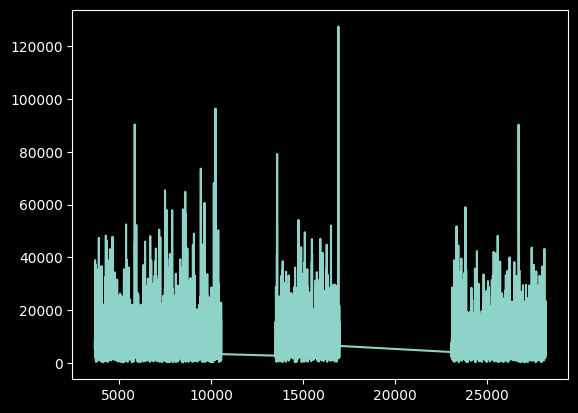

In [145]:
new_df[new_df.group == 'Gold']['revenue_from_staff'].plot()

<Axes: >

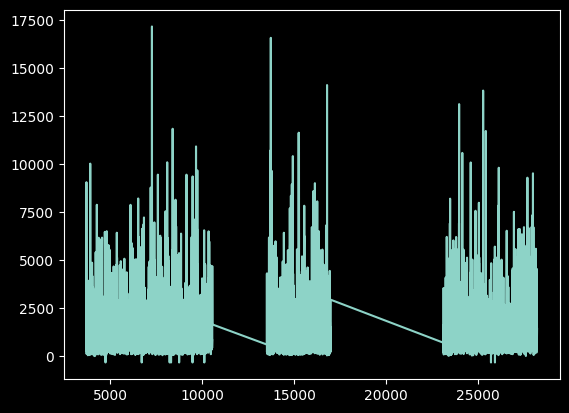

In [146]:
new_df[new_df.group == 'Silver']['revenue_from_staff'].plot()

In [31]:
new_df.head(5)

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price,revenue_from_staff,group
3695,2023-04-04 09:41:00,1418,Серьги-конго,1078603771148,БК СЕРЬГИ,"Au 585º -, разм.2,0",1.27,9180.0,3337.3345,5842.6655,Gold
3696,2023-04-04 09:41:00,1418,Серьги-конго,1078601848189,БК СЕРЬГИ,"Au 585º -, разм.3,0",2.17,15600.0,6294.5825,9305.4175,Gold
3697,2023-04-04 09:48:00,3309,"Кольцо-печатка с чёрн.эмалью, фиан. род.",1078580803357,СИ КОЛЬЦО ПЕЧАТ,"Ag 925º -, разм.20,0",2.67,2280.0,647.8755,1632.1245,Silver
3698,2023-04-04 09:51:00,3310,Кольцо-печатка с фиан. черн.,1078603110611,СИ КОЛЬЦО ПЕЧАТ,"Ag 925º -, разм.20,0",2.26,624.0,233.9100,390.0900,Silver
3699,2023-04-04 09:53:00,1419,Подвес,1078468601099,БК ПОДВЕС ДЕКОР,Au 585º -,0.98,7620.0,2127.7185,5492.2815,Gold


In [35]:
new_df.value_counts(subset = new_df.group, normalize= True)

group
Gold      0.550266
Silver    0.449734
Name: proportion, dtype: float64

### 55% данных в таблице это Золото
### 45% данных это серебро 

In [54]:
result = new_df.groupby('group')['revenue_from_staff'].agg(['mean', 'max', 'min'])
result.columns = ['mean_revenue', 'max_revenue', 'min_revenue'] 
result = result.reset_index() 

In [55]:
result

,group,mean_revenue,max_revenue,min_revenue
0,Gold,8903.841539,127380.017,292.7925
1,Silver,1244.156843,17148.050,-320.8000


### Интересно, мы получили, что min_revenue в Silver получилось отрицаиельным, значит есть товары, которые продаются ниже своей себестоимости, посмотрим на эти товары.
### Проще всего будет создать новую таблицу и там через логические операции все посчитать 

In [59]:
silver = new_df[new_df.group == 'Silver']

In [62]:
silver[silver.revenue_from_staff <= 0]

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price,revenue_from_staff,group
4749,2023-05-04 10:24:00,1303,Подвес Сердце с брилл. поз.,1078600516468,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
6715,2023-06-04 19:00:00,5007,Подвес Сердце с брилл. поз.,1078600545713,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
8234,2023-08-04 12:20:00,1314,Подвес Сердце с брилл. поз.,1078600516556,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
8310,2023-08-04 12:57:00,5011,Подвес Сердце с брилл. поз.,1078600545689,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
8750,2023-08-04 15:39:00,5016,Подвес Сердце с брилл. поз.,1078600545711,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
9477,2023-09-04 11:29:00,4164,Подвес Сердце с брилл. поз.,1078600531731,СИ ДФРС ПРОЕКТ,Ag 925º -,0.53,1.2,322.0,-320.8,Silver
10118,2023-09-04 15:58:00,5039,Подвес Сердце с брилл. поз.,1078600531110,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
25693,2023-05-04 14:39:00,1846,Подвес Сердце с брилл. поз.,1078600518107,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver
25909,2023-05-04 15:44:00,1849,Подвес Сердце с брилл. поз.,1078600518115,СИ ДФРС ПРОЕКТ,Ag 925º -,0.00,1.2,322.0,-320.8,Silver


In [64]:
silver[(silver.name == 'Подвес Сердце с брилл. поз.') & (silver.revenue_from_staff > 0)]

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price,revenue_from_staff,group
25829,2023-05-04 15:19:00,110,Подвес Сердце с брилл. поз.,1078600619069,СИ ДФРС ПРОЕКТ,Ag 925º -,0.55,864.0,322.0,542.0,Silver


# Результат анализа:
### Мы выяснили, что товар "Подвес Сердце с брилл. поз." девять раз был продан с убытком, а один раз принес прибыль. При этом стоит отметить, что время продажи могло совпадать, но в одних случаях мы теряли деньги, а в других — нет.

# Возможные причины:
### Техническая проблема: Возможно, где-то произошел сбой или ошибка в системе.
### Скидка на день рождения: Вероятно, покупатель воспользовался специальным предложением для клиентов, отмечающих день рождения.
### Акция "Покупай больше — получай дешевле": Товар мог быть предоставлен по специальной программе, где покупка украшений на определенную сумму давала возможность получить подвеску практически бесплатно.
### Акции "Купи _ и получи в подарок". В чеке пользователя находится какой-то товар, из-за которого он и получает такую скидку

### ----------------------------------------------------------------------------------------------------------------------------------
### К сожалению, из-за недостатка данных мы не можем проверить первую и вторую гипотезы. Однако третью и четвертую гипотезы мы можем исследовать более детально.

## Для этого, мы возьмем номера чеков, в которых была замечана данная подвеска и по ним посчитаем выручку 

In [67]:
specific_staff = silver[silver.name == 'Подвес Сердце с брилл. поз.']

In [72]:
specific_staff_array = np.array(specific_staff.num_of_receipt)
specific_staff_array

array([1303, 5007, 1314, 5011, 5016, 4164, 5039, 1846,  110, 1849])

In [79]:
t = new_df.groupby('num_of_receipt')['sell_price'].sum().reset_index()

In [80]:
t.head()

,num_of_receipt,sell_price
0,3,1248.0
1,4,2199.6
2,8,18000.0
3,10,7440.0
4,11,4164.0


In [82]:
t = t[t.num_of_receipt.isin(specific_staff_array)]

In [83]:
t

,num_of_receipt,sell_price
53,110,59485.2
691,1303,34858.8
701,1314,99264.0
1091,1846,74401.2
1094,1849,15966.0
2069,4164,47641.2
2653,5007,153661.2
2657,5011,173697.6
2661,5016,121448.4
2673,5039,75061.2


## Мы видим, что наша гипотеза "Покупай больше - плати меньше не верна" не верна потому что 110 чек (в котором, мы продали в плюс подвеску) не отличается от других(в которых мы подвеску в убыток продавали) 

In [84]:
new_df.head()

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price,revenue_from_staff,group
3695,2023-04-04 09:41:00,1418,Серьги-конго,1078603771148,БК СЕРЬГИ,"Au 585º -, разм.2,0",1.27,9180.0,3337.3345,5842.6655,Gold
3696,2023-04-04 09:41:00,1418,Серьги-конго,1078601848189,БК СЕРЬГИ,"Au 585º -, разм.3,0",2.17,15600.0,6294.5825,9305.4175,Gold
3697,2023-04-04 09:48:00,3309,"Кольцо-печатка с чёрн.эмалью, фиан. род.",1078580803357,СИ КОЛЬЦО ПЕЧАТ,"Ag 925º -, разм.20,0",2.67,2280.0,647.8755,1632.1245,Silver
3698,2023-04-04 09:51:00,3310,Кольцо-печатка с фиан. черн.,1078603110611,СИ КОЛЬЦО ПЕЧАТ,"Ag 925º -, разм.20,0",2.26,624.0,233.9100,390.0900,Silver
3699,2023-04-04 09:53:00,1419,Подвес,1078468601099,БК ПОДВЕС ДЕКОР,Au 585º -,0.98,7620.0,2127.7185,5492.2815,Gold


# Проверим 4 гипотезу
## Купи _ и получи в подарок

In [87]:
t2 = new_df[new_df.num_of_receipt.isin(specific_staff_array)]

In [97]:
t2.head(2)

,data_of_sale,num_of_receipt,name,barkod,staff_group,parameter,weight,sell_price,cost_price,revenue_from_staff,group
3730,2023-04-04 10:28:00,5011,Кольцо обручальное,1078487351590,БК КОЛЬЦА ОБРУЧ,"Au 585º -, разм.17,5",2.42,14820.0,5135.900,9684.100,Gold
3771,2023-04-04 11:02:00,1849,Серьги род.,1078386003166,СИ СЕРЬГИ БК,Ag 925º -,3.92,784.8,578.381,206.419,Silver


In [109]:
g = t2[['num_of_receipt', 'name']].groupby('name')['num_of_receipt'].count().reset_index()

In [110]:
g.head()

,name,num_of_receipt
0,Браслет Бисмарк черн.,1
1,Браслет Нонна пуст с а/г,1
2,Браслет Ромб тройной пуст с а/г,1
3,Браслет двойной ромб с алм.гр. поз.,1
4,Браслет для Шармов Сердце с фианитами,1


In [118]:
g[g.num_of_receipt >= 5]

,name,num_of_receipt
15,Кольцо обручальное,6
30,Подвес Сердце с брилл. поз.,10
51,"Серьги, фианит",6


In [95]:
t3 = t2.groupby(t2.num_of_receipt)['name'].agg(list).reset_index()

# Теперь нам нужно понять в какой товар одинаковый во всех чеках кроме 110, если такой есть, то наша гипотза верна, если нет, то нет :(

In [135]:
from collections import defaultdict
import pandas as pd

item_count = defaultdict(int)

def count_items(name_list):
    if isinstance(name_list, list): 
        for item in name_list:
            normalized_item = str(item).strip().lower()  
            if normalized_item:  
                item_count[normalized_item] += 1

t3['name'].apply(count_items)

sorted_items = sorted(item_count.items(), key=lambda x: x[1], reverse=True)

for item, count in sorted_items:
    print(f'Товар "{item}" присутствует {count} раз')

Товар "подвес сердце с брилл. поз." присутствует 10 раз
Товар "серьги, фианит" присутствует 6 раз
Товар "кольцо обручальное" присутствует 6 раз
Товар "кольцо" присутствует 2 раз
Товар "кольцо обручальное гладк.5мм род." присутствует 2 раз
Товар "цепь ромб тройной пуст с а/г" присутствует 2 раз
Товар "серьги" присутствует 2 раз
Товар "подвес, фианит" присутствует 2 раз
Товар "кольцо, фианит" присутствует 2 раз
Товар "кольцо обруч. с брилл. алм. гр." присутствует 2 раз
Товар "серьги-пусеты с брилл. с родир." присутствует 2 раз
Товар "кольцо с фиан. род." присутствует 2 раз
Товар "подвес с фиан. род." присутствует 2 раз
Товар "цепь якорь пуст" присутствует 1 раз
Товар "серьги крестики с фиан. род." присутствует 1 раз
Товар "кольцо с брилл. с родир." присутствует 1 раз
Товар "серьга-пусета с брилл.+фиан. с родир." присутствует 1 раз
Товар "серьги-пуссеты с фиан. род." присутствует 1 раз
Товар "пирсинг с фиан. род." присутствует 1 раз
Товар "серьги круг с фиан. род." присутствует 1 раз
Това

### К сожалению наша гипотеза не верна, будем формулировать выводы

# ------------------------------------------------------------------------------------------

# Нашей основной задачей было найти среднюю наценку по каждой категории среди серебрянных предметов украшения и золотых. 
## У нас получилось что:
## Золото - 8,903 руб
## Серебро - 1,244 руб

### Дополнительно мы нашли что в данных, возможно, присутствует ошибка и товар "подвес сердце с брилл. поз." мы продаем себе в убыток
### Также мы проверили и опровергли 2 гипотезы о том, что, товар мог быть предоставлен по специальной программе, где покупка украшений на определенную сумму давала возможность получить подвеску практически бесплатно. И В чеке пользователя находится какой-то товар, из-за которого он и получает такую скидку